In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Metrail+dataset.csv", header=1)
df.columns = ['Month', 'Travellers']
df.head()

,Month,Travellers
0,Feb-91,1638.0
1,Mar-91,1987.0
2,Apr-91,1825.0
3,May-91,NaN
4,Jun-91,1879.0


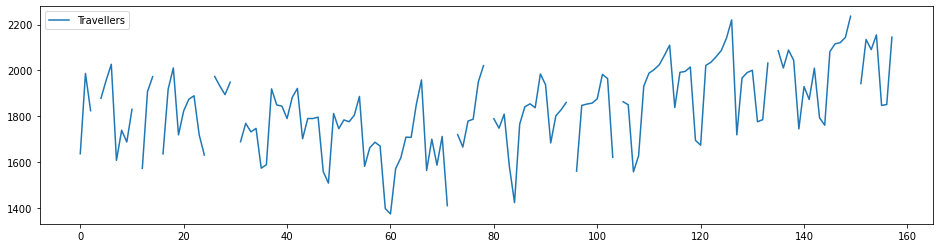

In [3]:
df.plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

In [4]:
df['Month'] =  pd.to_datetime(df['Month'], format='%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       158 non-null    datetime64[ns]
 1   Travellers  147 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [5]:
# Missig value Treatment (Linear Imputaiton)
df = df.assign(T_linear_imputation=df.Travellers.interpolate(method='linear')) 
df['Travellers'] = df['T_linear_imputation']
df = df.drop('T_linear_imputation', axis=1)
df.head()

,Month,Travellers
0,1991-02-01,1638.0
1,1991-03-01,1987.0
2,1991-04-01,1825.0
3,1991-05-01,1852.0
4,1991-06-01,1879.0


In [6]:
df = df.set_index('Month')

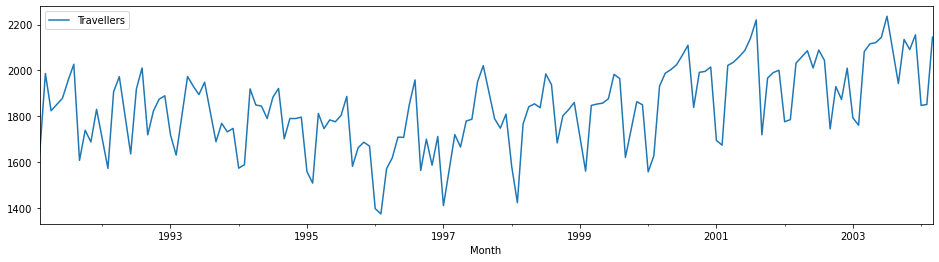

In [7]:
df.plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

In [8]:
print("No. of data points:", len(df))

No. of data points: 158


In [9]:
train_size = 120
train = df[0:train_size]
test = df[train_size:]

In [10]:
y_hat = test.copy()

In [11]:
# Naive Method
y_hat['naive_forcast'] = train['Travellers'][train_size-1]

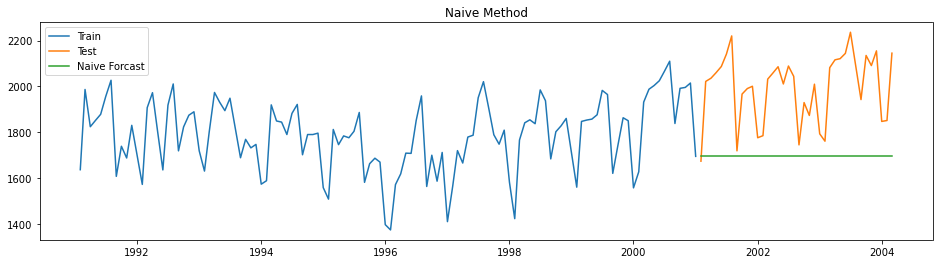

In [12]:
plt.figure(figsize=(16,4))
plt.plot(train['Travellers'], label='Train')
plt.plot(test['Travellers'], label='Test')
plt.plot(y_hat['naive_forcast'], label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [13]:
# Simple Avg. Method
y_hat['avg_forcast'] = train['Travellers'].mean()

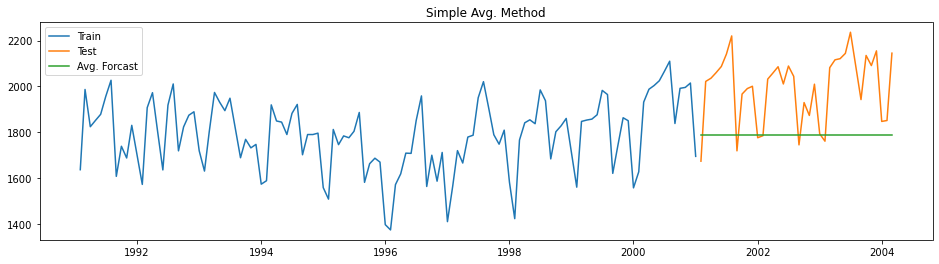

In [14]:
plt.figure(figsize=(16,4))
plt.plot(train['Travellers'], label='Train')
plt.plot(test['Travellers'], label='Test')
plt.plot(y_hat['avg_forcast'], label='Avg. Forcast')
plt.legend(loc='best')
plt.title('Simple Avg. Method')
plt.show()

## Calculating Error

In [15]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Travellers'], y_hat['naive_forcast'])) 
mape = np.round(np.mean(np.abs(test['Travellers'] - y_hat['naive_forcast'])*100/test['Travellers']))

In [16]:
results = pd.DataFrame({'Method':['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results.head()

,Method,MAPE,RMSE
0,Naive Method,15.0,334.219682


- Looking at MAPE, The accuracy is around 85% for this model

In [17]:
rmse = np.sqrt(mean_squared_error(test['Travellers'], y_hat['avg_forcast'])) 
mape = np.round(np.mean(np.abs(test['Travellers'] - y_hat['avg_forcast'])*100/test['Travellers']))

In [18]:
results = results.append(pd.DataFrame({'Method':['Simple Avg. Method'], 'MAPE':[mape], 'RMSE':[rmse]}))
results.head()

,Method,MAPE,RMSE
0,Naive Method,15.0,334.219682
0,Simple Avg. Method,11.0,255.614371


- Looking at MAPE, The accuracy is around 89% for this model

- Avg. Method seems to be better performing on comparing the error.